# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Loading the dataset

In [ ]:
b = sb.load_dataset(name = "iris")
b

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Function to find Mean of an attribute

In [ ]:
def mean(c):
    m = np.sum(c) / len(c)
    return m

#Function to find Variance of an attribute

In [ ]:
def var(c):
    m = mean(c)
    var = (np.sum((c - m) ** 2)) / (len(c) - 1)
    return var

# Standerdizing Each column

In [ ]:
def st(c_1 , c_2 , c_3 , c_4):
    m_1 = mean(c_1)
    s_1 = np.sqrt(var(c_1))
    m_2 = mean(c_2)
    s_2 = np.sqrt(var(c_2))
    m_3 = mean(c_3)
    s_3 = np.sqrt(var(c_3))
    m_4 = mean(c_4)
    s_4 = np.sqrt(var(c_4))

    st_1 = (c_1 - m_1)/s_1
    st_2 = (c_2 - m_2) /s_2
    st_3 = (c_3 - m_3) /s_3
    st_4 = (c_4 - m_4) /s_4
    return st_1 , st_2 , st_3 , st_4


# Function to find Covariance of any two attributes

In [ ]:
def cv(c_1 , c_2):
    m_st_1 = mean(c_1)
    m_st_2 = mean(c_2)
    x = c_1 - m_st_1
    y = c_2 - m_st_2
    pr = x * y
    sm = np.sum(pr)
    res = sm / (len(c_1) - 1)
    return res


# Bubble Sort to sort the eigenvalues

In [ ]:
def bubble(a,n):
  if n==1:
    return a
  for i in range(0,n-1):
    if a[i][0]<a[i+1][0]:
      a[i],a[i+1] = a[i+1],a[i]
  return bubble(a,n-1)

# Questions

## 1. Estimate the covariance matrix of the 4 attributes.

### Making a new dataset with standerdized values

In [ ]:
a = sb.load_dataset(name = "iris")
a_0 = b.iloc[:, 0].to_numpy()
a_1 = b.iloc[:, 1].to_numpy()
a_2 = b.iloc[:, 2].to_numpy()
a_3 = b.iloc[:, 3].to_numpy()
st_1 , st_2 , st_3 , st_4 = st(a_0,a_1,a_2,a_3)
a['sepal_length'] = st_1
a['sepal_width'] = st_2
a["petal_length"] = st_3
a['petal_width'] = st_4

### Printing teh Covariance Matrix

In [ ]:
c = [st_1 , st_2 , st_3 , st_4]
# c
res = np.zeros((4,4))
# res[1,2] = 4
for i in range(0,4):
    for j in range(0,4):
        res[i,j] = cv(c[i] , c[j])
print(res)

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


## 2.  Estimate the four principal components of the data.

In [ ]:
x,y = np.linalg.eig(res)
# print(x)
# print(y)
y = y.transpose()
z = [[x[i], y[i]] for i in range(4)]
z_s = bubble(z , len(z))
# print(z_s)
egval = []
egvector = []
for i in range(0,4):
    egval.append(z_s[i][0])

print('Eigenvalues:' )
print(egval)
egvector = np.zeros((4,4))
for i in range(0,4):
    for j in range(0,4):
        egvector[i][j] = z_s[i][1][j]
print('Eigenvectors(Principal Components):' )
egvectorf = egvector.transpose()
print(egvectorf)



Eigenvalues:
[2.9184978165319957, 0.9140304714680707, 0.14675687557131536, 0.020714836428619505]
Eigenvectors(Principal Components):
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


## 3. Perform dimensionality reduction using PCA to reduce 150 data points into two dimensions and three dimensions.

### Getting the attributes


In [ ]:
ab = a.iloc[:, :4].to_numpy()
ab

array([[-8.97673879e-01,  1.01560199e+00, -1.33575163e+00,
        -1.31105215e+00],
       [-1.13920048e+00, -1.31538812e-01, -1.33575163e+00,
        -1.31105215e+00],
       [-1.38072709e+00,  3.27317509e-01, -1.39239929e+00,
        -1.31105215e+00],
       [-1.50149039e+00,  9.78893485e-02, -1.27910398e+00,
        -1.31105215e+00],
       [-1.01843718e+00,  1.24503015e+00, -1.33575163e+00,
        -1.31105215e+00],
       [-5.35383973e-01,  1.93331463e+00, -1.16580868e+00,
        -1.04866679e+00],
       [-1.50149039e+00,  7.86173830e-01, -1.33575163e+00,
        -1.17985947e+00],
       [-1.01843718e+00,  7.86173830e-01, -1.27910398e+00,
        -1.31105215e+00],
       [-1.74301699e+00, -3.60966973e-01, -1.33575163e+00,
        -1.31105215e+00],
       [-1.13920048e+00,  9.78893485e-02, -1.27910398e+00,
        -1.44224482e+00],
       [-5.35383973e-01,  1.47445831e+00, -1.27910398e+00,
        -1.31105215e+00],
       [-1.25996379e+00,  7.86173830e-01, -1.22245633e+00,
      

### For 2 Dimension

In [ ]:
two_vector = egvectorf[:,:2]
pca_2 = np.matmul(ab , two_vector)
print(pca_2)

[[-2.25714118 -0.47842383]
 [-2.07401302  0.67188269]
 [-2.35633511  0.34076642]
 [-2.29170679  0.59539986]
 [-2.3818627  -0.64467566]
 [-2.06870061 -1.4842053 ]
 [-2.43586845 -0.04748512]
 [-2.22539189 -0.222403  ]
 [-2.32684533  1.1116037 ]
 [-2.17703491  0.46744757]
 [-2.15907699 -1.04020587]
 [-2.31836413 -0.132634  ]
 [-2.2110437   0.72624318]
 [-2.62430902  0.95829635]
 [-2.19139921 -1.85384655]
 [-2.25466121 -2.67731523]
 [-2.20021676 -1.47865573]
 [-2.18303613 -0.48720613]
 [-1.89223284 -1.40032757]
 [-2.33554476 -1.1240836 ]
 [-1.90793125 -0.40749058]
 [-2.19964383 -0.92103587]
 [-2.76508142 -0.4568133 ]
 [-1.81259716 -0.08527285]
 [-2.21972701 -0.13679618]
 [-1.9453293   0.62352971]
 [-2.04430277 -0.24135499]
 [-2.1613365  -0.52538942]
 [-2.13241965 -0.312172  ]
 [-2.25769799  0.33660425]
 [-2.13297647  0.50285608]
 [-1.82547925 -0.42228039]
 [-2.60621687 -1.78758727]
 [-2.43800983 -2.1435468 ]
 [-2.10292986  0.45866527]
 [-2.20043723  0.20541922]
 [-2.03831765 -0.65934923]
 

### For 3 Dimension

In [ ]:
three_vector = egvectorf[:,:3]
pca_3 = np.matmul(ab , three_vector)
print(pca_3)

[[-2.25714118 -0.47842383 -0.12727962]
 [-2.07401302  0.67188269 -0.23382552]
 [-2.35633511  0.34076642  0.0440539 ]
 [-2.29170679  0.59539986  0.0909853 ]
 [-2.3818627  -0.64467566  0.01568565]
 [-2.06870061 -1.4842053   0.02687825]
 [-2.43586845 -0.04748512  0.3343503 ]
 [-2.22539189 -0.222403   -0.08839935]
 [-2.32684533  1.1116037   0.14459247]
 [-2.17703491  0.46744757 -0.25291827]
 [-2.15907699 -1.04020587 -0.267784  ]
 [-2.31836413 -0.132634    0.09344619]
 [-2.2110437   0.72624318 -0.23014025]
 [-2.62430902  0.95829635  0.18019242]
 [-2.19139921 -1.85384655 -0.47132203]
 [-2.25466121 -2.67731523  0.03042468]
 [-2.20021676 -1.47865573 -0.00532625]
 [-2.18303613 -0.48720613 -0.04406769]
 [-1.89223284 -1.40032757 -0.37309338]
 [-2.33554476 -1.1240836   0.13218763]
 [-1.90793125 -0.40749058 -0.41988594]
 [-2.19964383 -0.92103587  0.1593315 ]
 [-2.76508142 -0.4568133   0.33106998]
 [-1.81259716 -0.08527285  0.03437344]
 [-2.21972701 -0.13679618  0.11759957]
 [-1.9453293   0.62352971

## 4. Visualize the reduced dimension 150 data points in 2D and 3D while giving different colors to reduced data points of diff different species.


### For 2 Dimension

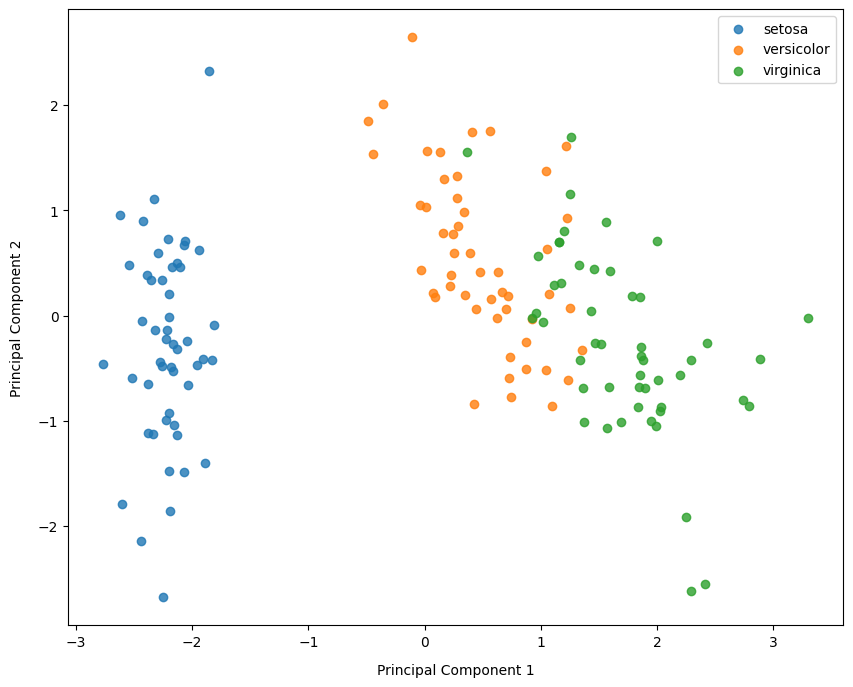

In [ ]:
x = pca_3[: , 0]
y = pca_3[: , 1]
x1 , y1  = x[:50] , y[:50]
x2 , y2= x[50:100] , y[50:100]
x3 , y3 = x[100:150] , y[100:150]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
ax.set_box_aspect(aspect = None)
ax.scatter(x1, y1, label = "setosa", alpha = 0.8)
ax.scatter(x2, y2, label = "versicolor", alpha = 0.8)
ax.scatter(x3, y3, label = "virginica", alpha = 0.8)
ax.set_xlabel('Principal Component 1',labelpad = 10)
ax.set_ylabel('Principal Component 2',labelpad = 10)
ax.legend()
plt.show()

### For 3 Dimnesion

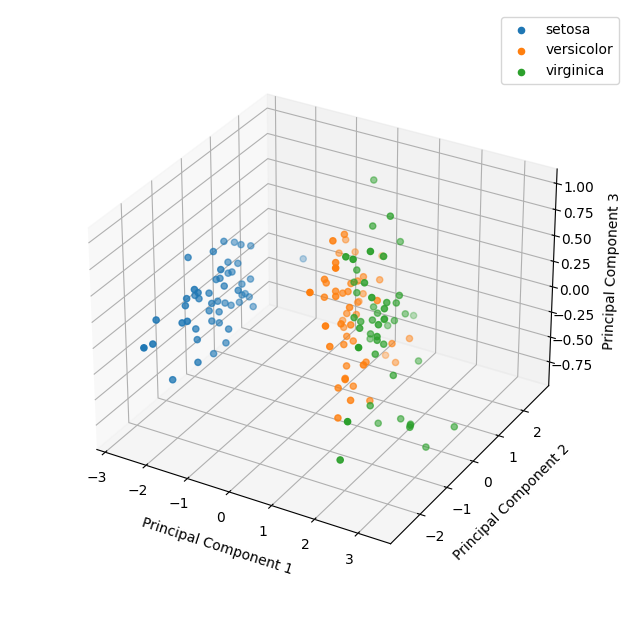

In [ ]:
x = pca_3[: , 0]
y = pca_3[: , 1]
z = pca_3[: , 2]
x1 , y1 , z1 = x[:50] , y[:50] , z[:50]
x2 , y2 , z2 = x[50:100] , y[50:100] , z[50:100]
x3 , y3 , z3 = x[100:150] , y[100:150] , z[100:150]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect = None,zoom = 0.85)
ax.scatter(x1, y1, z1, label = "setosa")
ax.scatter(x2, y2, z2, label = "versicolor")
ax.scatter(x3, y3, z3, label = "virginica")
ax.set_xlabel('Principal Component 1',labelpad = 10)
ax.set_ylabel('Principal Component 2',labelpad = 10)
ax.set_zlabel('Principal Component 3',labelpad = 10)
ax.legend()
plt.show()


# Report

## 1. Covariance Matrix Estimation:

The covariance matrix represents the covariance between different attributes in the dataset. The covariance between two variables X and Y is calculated using the formula:

\begin{equation}
 Cov(X, Y) = \frac{1}{n - 1} \times \sum_{i=1}^{10}(X_{i} - \bar{X})(Y_{i} - \bar{Y})
\end{equation}

Where:
1. $Cov(X, Y)$ is the covariance between variables $X$ and $Y$.
2. $n$ is the number of data points. Since we have a sample data we divide by $n-1$
3. $X_{i}$ and $Y_{i}$ are individual data points for variables $X$ and $Y$ respectively.
4. $\bar{X}$ and $\bar{Y}$ are the means of variables $X$ and $Y$ respectively.


## 2. Covariance Definition:

Covariance is a measure of the relationship between two variables. A positive covariance indicates that if one variable increases, then the other variable also tends to increase, whereas a negative covariance indicates an inverse relationship, that is if one variable increase the other tends to decrease.

## 3. Principal Component Analysis (PCA):

PCA is a dimensionality reduction technique that transforms a dataset into a new set of variables called principal components (PCs). These components capture the maximum variance in the data. The principal components (PCs) are calculated as follows:

1. PC1: First principal component, capturing the most variance in the data.
2. PC2: Second principal component, capturing the second most variance orthogonal to PC1.
3. PC3: Third principal component, capturing additional variance orthogonal to PC1 and PC2.
4. PC4: Fourth principal component, capturing remaining variance orthogonal to PC1, PC2, and PC3.

## 4. Principal Component (PC) Definition:

A principal component is a linear combination of original attributes in a dataset. The first principal component captures the most variance, and subsequent components capture decreasing amounts of variance while being orthogonal (uncorrelated) to previous components.

## 5. Learning Outcomes:

1. Understanding covariance and its calculation helps us understand the relationships between different attributes in a dataset.
2. The lab also helped us to understand the use of PCA in dimensionality reduction which reduces the computational complexity.




